<center>

*******************************************************************************************
    
### Isochronal Time-Rescaling

##### 11 December 2024

##### Juan Ignacio Mendoza Garay  

*******************************************************************************************

</center>

##### INFORMATION:

* Description:

    Time-rescaling of two or more signals into isochronal sections.
>
* Instructions:

    Edit the values indicated with an arrow like this: <---  
    Comment/uncomment or change values as suggested by the comments.  
    Run the program, close your eyes and hope for the best.  

*******************************************************************************************

In [132]:
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

#### Parameters for test:

In [133]:
n_sections = 8 # <--- number of sections
n_series = 3 # <--- number of series
length_minmax = [6000,10000] # <--- length of series [minimum,maximum]
random_var = True # <--- introduce random variations to data

#### Make synthetic data:

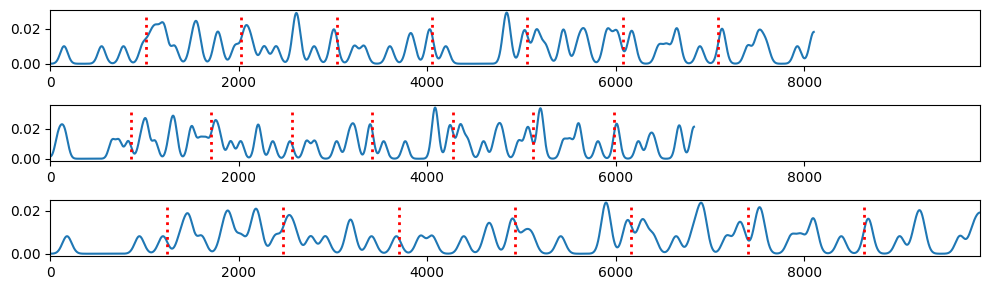

In [134]:
data_list = []
idx_cues_list = []
lengths = np.random.randint(length_minmax[0],length_minmax[1],n_series)
idx_peaks_mother = np.random.randint(1,length_minmax[1], np.random.randint(int(length_minmax[1]/200),int(length_minmax[1]/100)))
length_section_mother = int(length_minmax[1]/n_sections)
idx_cues_mother = np.arange(length_section_mother,length_minmax[1],length_section_mother)
for i in range(n_series):

    rescale_factor = lengths[i] / length_minmax[1]
    
    idx_peaks = (idx_peaks_mother * rescale_factor).astype(int)
    data_np = np.zeros(lengths[i])
    data_np[idx_peaks] = 1
    if random_var:
        idx_rp =np.random.randint(1,length_minmax[1], n_sections)
        idx_rp = (idx_rp * rescale_factor).astype(int)
        data_np[idx_rp] = 1
    data_np = gaussian_filter1d(data_np,int(rescale_factor*length_minmax[1]/200))
    data_list.append(data_np)
    
    idx_cues_list.append( (idx_cues_mother * rescale_factor).astype(int) )

max_length_data = np.max(lengths)
plt.figure(figsize= (10,n_series))
for i in range(n_series):
    plt.subplot(n_series,1,i+1)
    plt.plot(data_list[i])
    plt.xlim((0,max_length_data))
    plt.vlines(x=idx_cues_list[i],
               ymin=np.min(data_list[i]),ymax=np.max(data_list[i]),colors='r',linestyles=':',linewidths=2);
plt.tight_layout()

#### Rescale to isochronal sections:

In [ ]:
max_length = 0
for i in range(len(data_list)):
    if data_list[i].shape[0] > max_length: max_length = data_list[i].shape[0]
length_section = round(max_length/n_sections)
length_total = length_section * n_sections
iso_warped = np.empty((length_total,len(data_list)))
idx_iso_warped_sections_list = []
for i_series in range(len(data_list)):
    i_r_start = 0 # index raw
    i_w_start = 0 # index time-rescaled by interpolation
    for i_section in range(n_sections):
        if i_section == n_sections-1:
            i_r_end = -1
        else:
            i_r_end = idx_cues_list[i_series][i_section] 
        section_raw = data_list[i_series][i_r_start : i_r_end ]
        i_r_start = i_r_end
        
        t_raw = np.linspace(0, len(section_raw)-1,  len(section_raw))
        interpol = CubicSpline(t_raw, section_raw)
        t_rescaled = np.linspace(0, len(section_raw)-1, num= int(length_section))
        
        i_w_end = i_w_start + length_section
        iso_warped[ i_w_start : i_w_end , i_series ] = interpol(t_rescaled)
        i_w_start = i_w_end

        if i_series == 1:
            idx_iso_warped_sections_list.append(i_w_start)

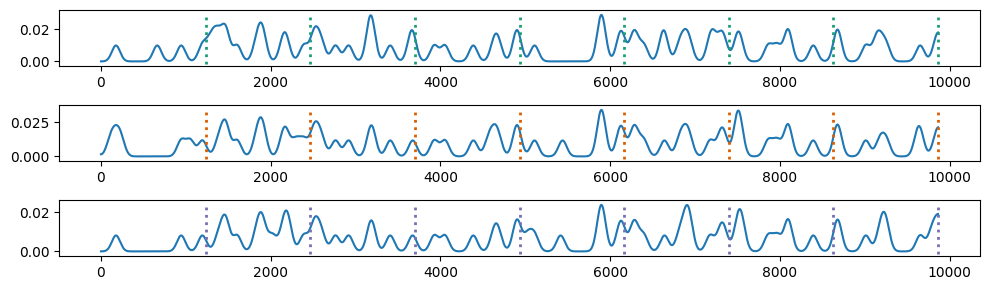

In [136]:
# Visualise time-rescaled data:

plt.figure(figsize= (10,len(data_list)))
for i in range(iso_warped.shape[1]):
    plt.subplot(iso_warped.shape[1],1,i+1)
    plt.plot(iso_warped[:,i])
    ylims = plt.ylim()
    plt.vlines(x = idx_iso_warped_sections_list, ymin=ylims[0], ymax=ylims[1], 
                       colors = plt.cm.Dark2([i]),
                       linestyles=':',linewidths=2)
plt.tight_layout()   